# SVM Handwritten Digits Prediction

We want to get a machine to learn how to recognize digits. 

Scikit-learn has some builtin datasets

In [1]:
from sklearn import datasets

The most famous one in ML is the MNIST dataset. 

In [2]:
digits = datasets.load_digits()

Let's take a look at the data briefly. 

In [3]:
print(digits.data)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


That was not very helpful. We need to study it in a bit more detail. 

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.data[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

And what are we trying to predict? 

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
digits.target[-10:]

array([5, 4, 8, 8, 4, 9, 0, 8, 9, 8])

In [8]:
digits.target.shape

(1797,)

# Learning the digits

Let's load a builtin classifier -- an object that decides what the image corresponds to. 

In [9]:
from sklearn import svm

Don't worry about the exact values we've put in for the parameters. They're not important for us at the moment. 

In [10]:
clf = svm.SVC(gamma=0.001, C=100.)

Let's tell the classifier to learn from the data. We'll show it all the images and tell it which ones they are -- except for the last one. We'll hold that secret. 

In [11]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

The machine has learned the digits -- or so it thinks. Let's test it on the one digits we never showed it. Notice that we're not telling it the `target`. 

In [12]:
clf.predict(digits.data[-1:])

array([8])

Let's see what that image looks like and whether the prediction makes sense. 

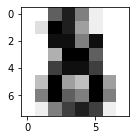

In [13]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(2, 2))
plt.imshow(digits.images[-1], interpolation='nearest', cmap=plt.cm.binary)

Let's go back and see where all the learning happened. 